# CNN - fashion_mnist dataset

The Fashion MNIST data set contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels). 

In [2]:
# 1. Import requisite packages

import numpy             as np
import matplotlib.pyplot as plt
import keras

from keras.datasets import fashion_mnist                                       # Import the dataset
from keras.layers   import Dense, Activation, Flatten, Conv2D, MaxPooling2D    # Convolutional, pooling, flatten, fully connected layers
from keras.models   import Sequential                                          # Model of the neural network
from keras.utils    import np_utils                                            # One-hot encoding - Categorical y variable

Using TensorFlow backend.
C:\Users\npm\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\npm\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\npm\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\npm\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: Fu

In [13]:
# 2. Load the dataset

(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

print('Train dataset dimensions : X = %s, y = %s' % (train_X.shape, train_Y.shape))
print('Test dataset dimensions  : X = %s, y = %s' % (test_X.shape, test_Y.shape))
#train_X                       # To check the 3D array elements

Train dataset dimensions : X = (60000, 28, 28), y = (60000,)
Test dataset dimensions  : X = (10000, 28, 28), y = (10000,)


**Interpretation**

- We observe that there are 60,000 examples in the training dataset
- There are 10,000 in the test dataset
- Images are indeed a square with 28×28 pixels

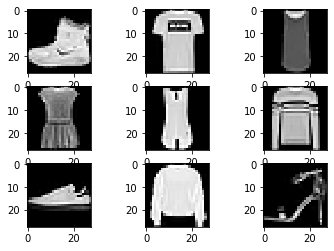

In [27]:
# 3. Visualize the training dataset (first 4 images)

for i in range(9):
    plt.subplot(330 + 1 + i)                              # define subplot
    plt.imshow(train_X[i], cmap=plt.get_cmap('gray'))     # plot raw pixel data
plt.show()                                                # show the figure

In [8]:
# 4. Flatten the images - Convert 28*28 square images arranged as a matrix to a 784 vector

train_X = train_X.reshape(-1, 28,28, 1).astype('float32')
test_X  = test_X.reshape(-1, 28,28, 1).astype('float32')
print("Dimensions of the vector train_X :",train_X.shape)
print("Dimensions of the vector test_X  :",test_X.shape)

Dimensions of the vector train_X : (60000, 28, 28, 1)
Dimensions of the vector test_X  : (10000, 28, 28, 1)


## Observations

- When using a convolutional layer as the first layer to our model, we need to reshape our data to (n_images, x_shape, y_shape,   channels)
- Set channels to 1 for grayscale images & set channels to 3 when you have a set of RGB-images as input
- Negative one is the same as specifying the total number of images in the training set
- Modifying the values of each pixel such that they range from 0 to 1 will improve the rate at which our model learns

In [14]:
# 5. Normalize inputs from 0 to 255 to 0 to 1

train_X = train_X / 255
test_X = test_X / 255

In [10]:
# 6. One hot encode target values - Y variable

train_Y_one_hot     = np_utils.to_categorical(train_Y)

test_Y_one_hot      = np_utils.to_categorical(test_Y)

In [15]:
# 7. Build the model

model = Sequential()                             # Neural network framework

model.add(Conv2D(64, (3,3), input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))                     # Convolutional layer
model.add(Activation('relu'))                    # Activation function - Covolutional layer
model.add(MaxPooling2D(pool_size=(2,2)))         # Pooling layer

model.add(Flatten())                             # Flatten layer

model.add(Dense(64))                             # Fully connected layer
model.add(Dense(10))
model.add(Activation('softmax'))                 # Activation function - Fully connected layer - Multiclass classification

model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

## Training

- Our convolutional layers will have 64 neurons (feature maps) and a 3x3 feature detector (Filter/ kernel)
- In turn, our pooling layers will use max pooling with a 2x2 matrix
- Convolutional neural networks are almost always proceeded by an artificial neural network
- In Keras, a Dense layer implements the operation output = activation(dot(input, weight) + bias)
- The input to our artificial neural network must be in one dimension therefore we flatten it       beforehand

In [16]:
# 8. Fit the model

model.fit(train_X, train_Y_one_hot, batch_size=64, epochs=10)

ValueError: Error when checking input: expected conv2d_3_input to have 4 dimensions, but got array with shape (60000, 28, 28)

#### Interpretation

- The batch size must match the number of images going into our first convolutional layer
- By the tenth epoch, we obtained an accuracy of 94% (accuracy: 0.94) which is really good

In [34]:
# 9. Check the Accuracy of the model

test_loss, test_acc = model.evaluate(test_X, test_Y_one_hot)

print('Test loss     :', test_loss)
print('Test accuracy :', test_acc)

10000/10000 [==============================] - 4s 430us/step
Test loss     : 0.27768435142040254
Test accuracy : 0.9071999788284302


In [ ]:
#### Interpretation

As you can see, based off the test accuracy, we’ve slightly overfitted our model

In [35]:
# 10. Let’s look at the first prediction made by our model

predictions = model.predict(test_X)
print(np.argmax(np.round(predictions[0])))

# Note: - The number 9 has a matching class ofAnkle boot

9


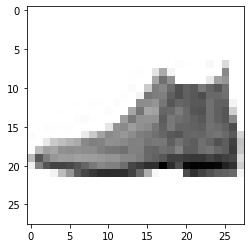

In [36]:
# 11. Display the first image

plt.imshow(test_X[0].reshape(28, 28), cmap = plt.cm.binary)
plt.show()

#### Interpretation

Our model correctly classified the first image in our testing data set